In [51]:
import numpy as np 
import pandas as pd  
import seaborn as sns 
import matplotlib.pyplot as plt  
%matplotlib inline 
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("C:/Users/sanat/Downloads/coursework_data.csv") 
data.head()

,Domain,category
0,noriomatsumoto.com,1
1,haplessmales.com,1
2,shivamchatuvedi.com,1
3,dailyfreebieoffer.com,1
4,poniemall.com,1


In [4]:
print(data.shape)

(10000, 2)


In [5]:
data.category.unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [6]:
data.describe()

,category
count,10000.000000
mean,1.750000
std,1.134737
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,5.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Domain    10000 non-null  object
 1   category  10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [8]:
#Checking if the data is duplicate or not
data.duplicated().sum()

0

In [9]:
#Checking if the data having some null values or not
data.isnull().sum()

Domain      0
category    0
dtype: int64

**Exploratory Data Analysis**

Text(0, 0.5, 'Count')

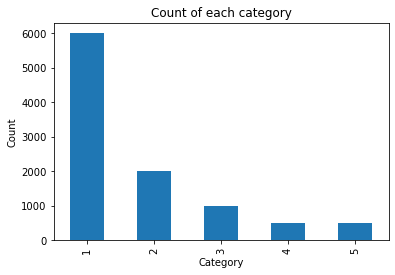

In [17]:
data['category'].value_counts().plot(kind='bar')
plt.title("Count of each category")
plt.xlabel("Category")
plt.ylabel("Count")

**It seems that majority of the domains are of Category 1**

In [20]:
#Creating a column that stores the length of domain
data['Length'] = data['Domain'].apply(len)
data

,Domain,category,Length
0,noriomatsumoto.com,1,18
1,haplessmales.com,1,16
2,shivamchatuvedi.com,1,19
3,dailyfreebieoffer.com,1,21
4,poniemall.com,1,13
...,...,...,...
9995,citymark.com,5,12
9996,offroading.com,5,14
9997,cevon.com,5,9
9998,mozzilla.com,5,12


<AxesSubplot:xlabel='category', ylabel='Length'>

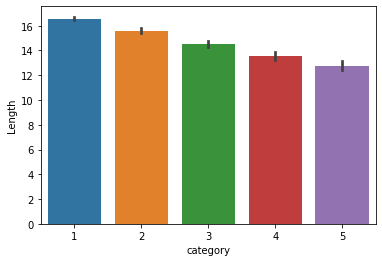

In [23]:
sns.barplot(x=data['category'],y=data['Length'])

**Category 1 has the Longest Domain length followed by Category 2 and the shortest being category 5**

##### Let us Visualize the longest and shortest Domain

In [25]:
data.Length.describe()

count    10000.00000
mean        15.84330
std          5.00694
min          6.00000
25%         12.00000
50%         15.00000
75%         19.00000
max         57.00000
Name: Length, dtype: float64

**As we can see that the min value of length is 6 and max is 57, let us locate the domain.**

In [26]:
#Shortest domain
data.loc[data['Length']==6,['Domain','Length']]

,Domain,Length
8450,0v.com,6
9652,6f.com,6
9653,we.com,6
9705,3w.com,6
9863,yb.com,6


In [27]:
#Longest Domain
data.loc[data['Length']==57,['Domain','Length']]

,Domain,Length
499,pt-rooms-booking-pay-3532592376-89327596-check...,57


#### Data Preprocessing

**Let us remove the punctuations from the text data**

In [28]:
#Python built-in library 
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


**Let us remove the punctuations:**

In [30]:
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    return text
data['Domain_clean'] = data['Domain'].apply(lambda x: remove_punct(x))
data.head()

,Domain,category,Length,Domain_clean
0,noriomatsumoto.com,1,18,noriomatsumotocom
1,haplessmales.com,1,16,haplessmalescom
2,shivamchatuvedi.com,1,19,shivamchatuvedicom
3,dailyfreebieoffer.com,1,21,dailyfreebieoffercom
4,poniemall.com,1,13,poniemallcom


In [31]:
#Separating the data as Texts and labels

X= data['Domain_clean'] #Input feature
Y= data['category'] #output feature

In [32]:
#For Spliting the data set into test data and train data importing Model Selection library from Sklearn

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size=0.3, random_state=2)


In [33]:
print(X.shape)
print(X_train.shape)
print('How much data we are using in our testing purpose',X_test.shape)

(10000,)
(7000,)
How much data we are using in our testing purpose (3000,)


In [34]:
Y_test.unique()

array([2, 1, 3, 4, 5], dtype=int64)

Feature Extraction




---

Transforming the text data to feature vectors that can be used as imput to our Machine Learning Model 





In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase='True')

X_train_new = tfidf.fit_transform(X_train)
X_test_new= tfidf.transform(X_test)
#converting Y_train and Y_test values as integers

Y_train = Y_train.astype('int')


In [37]:
X_train_new

<7000x7000 sparse matrix of type '<class 'numpy.float64'>'
	with 7000 stored elements in Compressed Sparse Row format>

In [38]:
print(X_test)

7878    assurancesecuritycom
3224           briansperlcom
1919     bestdutchcasinoscom
4432                funducom
4835     southindianbeerscom
                ...         
6772          fashionbookcom
4048      thewildonestourcom
623      theshoponthehillcom
9952         theoutsiderscom
3124              yubaomecom
Name: Domain_clean, Length: 3000, dtype: object


### Model Creating:

**1. Suport Vector Machine(SV Classifier)**

In [39]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(X_train_new, Y_train)

SVC()

**Model Evaluation:**

In [46]:
prediction_on_training_data = model1.predict(X_train_new)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print("SVM Model Training accuracy: ",round(accuracy_on_training_data*100,2),"%")

SVM Model Training accuracy:  90.24 %


In [49]:
prediction_on_testing = model1.predict(X_test_new)
accuracy_on_testing = accuracy_score(Y_test, prediction_on_testing)
print("SVM Model Testing accuracy: ",round(accuracy_on_testing*100,2),"%")

SVM Model Testing accuracy:  60.3 %


In [50]:
print(classification_report(Y_test,prediction_on_testing))

              precision    recall  f1-score   support

           1       0.60      1.00      0.75      1809
           2       0.00      0.00      0.00       585
           3       0.00      0.00      0.00       289
           4       0.00      0.00      0.00       148
           5       0.00      0.00      0.00       169

    accuracy                           0.60      3000
   macro avg       0.12      0.20      0.15      3000
weighted avg       0.36      0.60      0.45      3000



c:\Users\sanat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sanat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sanat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Tuning SVM Model:**

In [63]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','poly']} 
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose =3) 
grid.fit(X_train_new, Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.599 total time=   1.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.599 total time=   1.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.599 total time=   1.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.599 total time=   1.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.599 total time=   1.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.599 total time=   0.7s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.599 total time=   0.7s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.599 total time=   0.7s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.599 total time=   0.7s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.599 total time=   0.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.599 total time=   0.9s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly']},
             verbose=3)

In [64]:
print("Best Parameters are: ",grid.best_params_)
print("Highest Accuracy Achieved: ",round(grid.best_score_*100,2),"%")

Best Parameters are:  {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Highest Accuracy Achieved:  59.87 %


**Evaluating the tuned SVM:**

In [65]:
sv_tuned=SVC(C= 0.1, gamma= 1, kernel= 'rbf')
sv_tuned.fit(X_train_new,Y_train)

SVC(C=0.1, gamma=1)

In [66]:
prediction_on_training_data = sv_tuned.predict(X_train_new)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print("SVM Model(Tuned) Training accuracy: ",round(accuracy_on_training_data*100,2),"%")

SVM Model(Tuned) Training accuracy:  59.87 %


In [67]:
prediction_on_testing = sv_tuned.predict(X_test_new)
accuracy_on_testing = accuracy_score(Y_test, prediction_on_testing)
print("SVM Model Testing accuracy: ",round(accuracy_on_testing*100,2),"%")

SVM Model Testing accuracy:  60.3 %


**2.Random Forest Classifier**

In [68]:
from sklearn.ensemble import RandomForestClassifier
Model2=RandomForestClassifier()
Model2.fit(X_train_new,Y_train)

RandomForestClassifier()

**Evaluating Model:**

In [70]:
prediction_on_training_data = Model2.predict(X_train_new)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print("Random Forest Model Training accuracy: ",round(accuracy_on_training_data*100,2),"%")

Random Forest Model Training accuracy:  99.8 %


In [71]:
prediction_on_testing = Model2.predict(X_test_new)
accuracy_on_testing = accuracy_score(Y_test, prediction_on_testing)
print("Random Forest Model Testing accuracy: ",round(accuracy_on_testing*100,2),"%")

Random Forest Model Testing accuracy:  60.3 %


In [73]:
print(classification_report(Y_test,prediction_on_testing))

              precision    recall  f1-score   support

           1       0.60      1.00      0.75      1809
           2       0.00      0.00      0.00       585
           3       0.00      0.00      0.00       289
           4       0.00      0.00      0.00       148
           5       0.00      0.00      0.00       169

    accuracy                           0.60      3000
   macro avg       0.12      0.20      0.15      3000
weighted avg       0.36      0.60      0.45      3000



In [79]:
#Hyperparameter Tuning for Random Forest
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=5, stop=45, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(2, 8, num=2)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rfc_tuned = RandomizedSearchCV(estimator=Model2, scoring='accuracy',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, n_jobs=-1)
rfc_tuned.fit(X_train_new,Y_train)
rf_best_params = rfc_tuned.best_params_##it will give you best parameters 
print(f"Best paramters: {rf_best_params})") 

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 9, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 8, 'bootstrap': False})


In [ ]:
print("Best Parameters are: ",rfc_tuned.best_params_)
print("Highest Accuracy Achieved: ",round(rfc_tuned.best_score_*100,2),"%")

**Evaluating Tuned Random Forest Model:**

In [80]:
rfc_tuned=RandomForestClassifier(n_estimators= 9, min_samples_split= 10, min_samples_leaf= 2, max_features ='auto',max_depth=8,bootstrap= False)
rfc_tuned.fit(X_train_new,Y_train)

RandomForestClassifier(bootstrap=False, max_depth=8, max_features='auto',
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=9)

In [81]:
prediction_on_training_data = rfc_tuned.predict(X_train_new)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print("Random Forest Model Training accuracy: ",round(accuracy_on_training_data*100,2),"%")

Random Forest Model Training accuracy:  59.87 %


In [82]:
prediction_on_testing = rfc_tuned.predict(X_test_new)
accuracy_on_testing = accuracy_score(Y_test, prediction_on_testing)
print("Random Forest Model Testing accuracy: ",round(accuracy_on_testing*100,2),"%")

Random Forest Model Testing accuracy:  60.3 %


In [83]:
print(classification_report(Y_test,prediction_on_testing))

              precision    recall  f1-score   support

           1       0.60      1.00      0.75      1809
           2       0.00      0.00      0.00       585
           3       0.00      0.00      0.00       289
           4       0.00      0.00      0.00       148
           5       0.00      0.00      0.00       169

    accuracy                           0.60      3000
   macro avg       0.12      0.20      0.15      3000
weighted avg       0.36      0.60      0.45      3000



**3. Naive Bayes Classifier**

In [75]:
from sklearn.naive_bayes import MultinomialNB
Model3=MultinomialNB()
Model3.fit(X_train_new,Y_train)

MultinomialNB()

In [76]:
prediction_on_training_data = Model3.predict(X_train_new)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print("Naive Bayes Model Training accuracy: ",round(accuracy_on_training_data*100,2),"%")

Naive Bayes Model Training accuracy:  59.87 %


In [77]:
prediction_on_testing = Model3.predict(X_test_new)
accuracy_on_testing = accuracy_score(Y_test, prediction_on_testing)
print("Naive Bayes Model Testing accuracy: ",round(accuracy_on_testing*100,2),"%")

Naive Bayes Model Testing accuracy:  60.3 %


In [78]:
print(classification_report(Y_test,prediction_on_testing))

              precision    recall  f1-score   support

           1       0.60      1.00      0.75      1809
           2       0.00      0.00      0.00       585
           3       0.00      0.00      0.00       289
           4       0.00      0.00      0.00       148
           5       0.00      0.00      0.00       169

    accuracy                           0.60      3000
   macro avg       0.12      0.20      0.15      3000
weighted avg       0.36      0.60      0.45      3000



**Tuning the model**

In [85]:
param_grid = {'alpha':[0.0,1.0],'fit_prior':['True','False']} 
grid = GridSearchCV(Model3, param_grid, refit=True, verbose =3) 
grid.fit(X_train_new, Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .........alpha=0.0, fit_prior=True;, score=0.599 total time=   0.0s
[CV 2/5] END .........alpha=0.0, fit_prior=True;, score=0.599 total time=   0.0s
[CV 3/5] END .........alpha=0.0, fit_prior=True;, score=0.599 total time=   0.0s
[CV 4/5] END .........alpha=0.0, fit_prior=True;, score=0.599 total time=   0.0s
[CV 5/5] END .........alpha=0.0, fit_prior=True;, score=0.599 total time=   0.0s
[CV 1/5] END ........alpha=0.0, fit_prior=False;, score=0.599 total time=   0.0s
[CV 2/5] END ........alpha=0.0, fit_prior=False;, score=0.599 total time=   0.0s
[CV 3/5] END ........alpha=0.0, fit_prior=False;, score=0.599 total time=   0.0s
[CV 4/5] END ........alpha=0.0, fit_prior=False;, score=0.599 total time=   0.0s
[CV 5/5] END ........alpha=0.0, fit_prior=False;, score=0.599 total time=   0.0s
[CV 1/5] END .........alpha=1.0, fit_prior=True;, score=0.599 total time=   0.0s
[CV 2/5] END .........alpha=1.0, fit_prior=True;,

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.0, 1.0], 'fit_prior': ['True', 'False']},
             verbose=3)

In [86]:
print("Best Parameters are: ",grid.best_params_)
print("Highest Accuracy Achieved: ",round(grid.best_score_*100,2),"%")

Best Parameters are:  {'alpha': 0.0, 'fit_prior': 'True'}
Highest Accuracy Achieved:  59.87 %


**Evaluating Tuned Naive Bayes**

In [87]:
nb_tuned=MultinomialNB(alpha=0.0,fit_prior=True)
nb_tuned.fit(X_train_new,Y_train)

MultinomialNB(alpha=0.0)

In [88]:
prediction_on_training_data = nb_tuned.predict(X_train_new)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print("Naive Bayes(Tuned) Model Training accuracy: ",round(accuracy_on_training_data*100,2),"%")

Naive Bayes(Tuned) Model Training accuracy:  100.0 %


In [89]:
prediction_on_testing = nb_tuned.predict(X_test_new)
accuracy_on_testing = accuracy_score(Y_test, prediction_on_testing)
print("Naive Bayes Model Testing accuracy: ",round(accuracy_on_testing*100,2),"%")

Naive Bayes Model Testing accuracy:  60.3 %


In [90]:
print(classification_report(Y_test,prediction_on_testing))

              precision    recall  f1-score   support

           1       0.60      1.00      0.75      1809
           2       0.00      0.00      0.00       585
           3       0.00      0.00      0.00       289
           4       0.00      0.00      0.00       148
           5       0.00      0.00      0.00       169

    accuracy                           0.60      3000
   macro avg       0.12      0.20      0.15      3000
weighted avg       0.36      0.60      0.45      3000



In [91]:
abc_mail=["swampnaturals.com"]

input_data_fea = tfidf.transform(abc_mail)

prediction = nb_tuned.predict(input_data_fea)

print(prediction)

[1]
